In [71]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

pd.options.display.max_columns = None
plt.rcParams["figure.figsize"] = (10,8)

---

### Salario: para promocionar próximas formaciones q25 acorde con el puesto de trabajo(q5), el género(q2) y la edad(q1) 

---

In [72]:
df = pd.read_csv("../Archivos/profesionales_nonull.csv", index_col= 0)

In [73]:
df.head(3)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees","Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL , MongoDB",None,NaN,Kaggle Notebooks,I do not share my work publicly,DataCamp,"Amazon Web Services (AWS) , Google Cloud Plat...","Microsoft Azure Virtual Machines , Google Clo...","Azure Machine Learning Studio , Google Cloud ...","MySQL ,PostgreSQL ,MongoDB","Microsoft Power BI,Tableau","Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML,TensorBoard,1000.0


In [74]:
df.salario.isnull().sum()

5804

In [75]:
def limpiar(col):
    try:
        return col.replace("+","").split("-")[0]
    except:
        return col

In [76]:
df["edad_int"] = df["edad"].apply(limpiar).astype("Int64", errors= "raise")


In [77]:
df["salario"] = pd.Series([round(val, 0) for val in df['salario']])

In [78]:
df["salario"] = df["salario"].astype("Int64", errors= "raise")

In [79]:
df["salario"].unique()

<IntegerArray>
[ 30000,  70000,   1000,  40000,  15000,   7500,  25000,  10000,  28361,
   3000,  20000, 125000,   2000,  50000,   4000,  80000,   5000,  60000,
 100000,  90000,   <NA>]
Length: 21, dtype: Int64

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

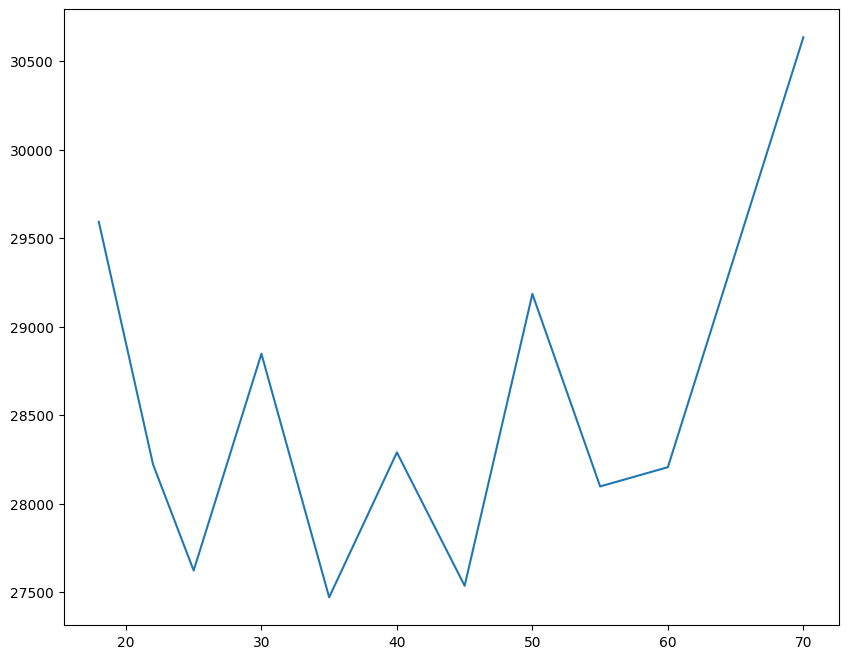

In [80]:

fig = sns.lineplot(x='edad_int', y = 'salario', data = df, hue='genero')

# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')

# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad');

